# GPU CONFIG

In [ ]:
!pip install tensorflow-gpu


In [ ]:
!nvidia-smi

In [ ]:
#@markdown <h3>← 0th Step. Run after entering the above code in your browser console (to prevent disconnection). </h>
#@markdown <h4>← function ClickConnect(){ console.log("Working"); document.querySelector("colab-connect-button").click() }setInterval(ClickConnect,6000)</h4>


import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


# Drive Mount and Path Selection

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

# re-size all the images to this
IMAGE_SIZE = [200, 100]

train_path = '/content/gdrive/MyDrive/Font Detection/New/Train'
valid_path = '/content/gdrive/MyDrive/Font Detection/New/Test'

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# Inception V3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


# VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
inception = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# VGG19

In [ ]:
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

inception = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


# ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

inception = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 3s 0us/step


# Xception

In [ ]:

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

inception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

83697664/83683744 [==============================] - 0s 0us/step


# Testing Model

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/Font Detection/New/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

In [ ]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Font Detection/New/Train',
                                                 target_size = (200, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5200 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Font Detection/New/Test',
                                            target_size = (200, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1300 images belonging to 5 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/40
163/163 [==============================] - 3630s 22s/step - loss: 0.6763 - accuracy: 0.7712 - val_loss: 0.4430 - val_accuracy: 0.8777
Epoch 2/40
163/163 [==============================] - 36s 218ms/step - loss: 0.3304 - accuracy: 0.9098 - val_loss: 0.3645 - val_accuracy: 0.8923
Epoch 3/40
163/163 [==============================] - 37s 224ms/step - loss: 0.2423 - accuracy: 0.9348 - val_loss: 0.2691 - val_accuracy: 0.9292
Epoch 4/40
163/163 [==============================] - 36s 218ms/step - loss: 0.1957 - accuracy: 0.9513 - val_loss: 0.2457 - val_accuracy: 0.9323
Epoch 5/40
163/163 [==============================] - 35s 217ms/step - loss: 0.1656 - accuracy: 0.9575 - val_loss: 0.2466 - val_accuracy: 0.9300
Epoch 6/40
163/163 [==============================] - 35s 214ms/step - loss: 0.1446 - accuracy: 0.9629 - val_loss: 0.2106 - val_accuracy: 0.9446
Epoch 7/40
163/163 [==============================] - 36s 218ms/step - loss: 0.1308 - accuracy: 0.9665 - val_loss: 0.2117 - val_ac

In [ ]:
result = model.evaluate(test_set)

41/41 [==============================] - 3s 71ms/step - loss: 0.2593 - accuracy: 0.9338


In [ ]:
# !mkdir -p saved_model
# model.save('VGG16.h5')
model.save('/content/gdrive/MyDrive/Font Detection/VGG16.h5')

In [ ]:
for i in range(10000000000):
  continue

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Plot

In [ ]:
import matplotlib.pyplot as plt

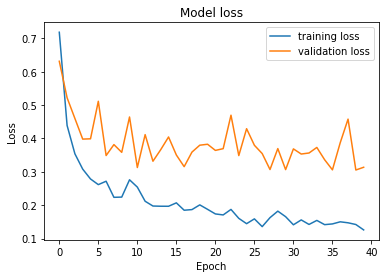

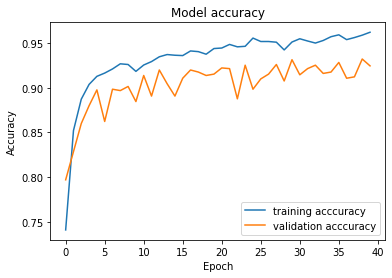

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='training acccuracy')
plt.plot(r.history['val_accuracy'], label='validation acccuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

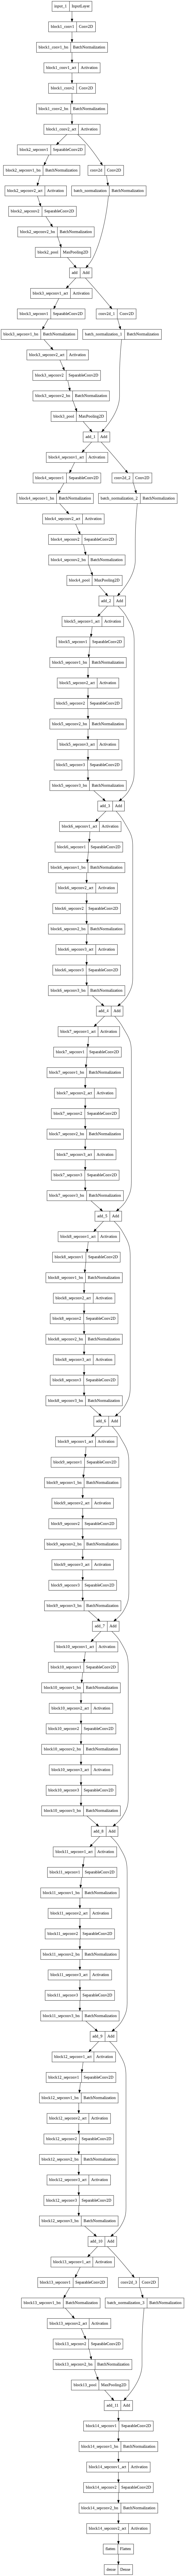

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
print(r.history['accuracy'])
print(r.history['val_accuracy'])


[0.7407692074775696, 0.8521153926849365, 0.8873077034950256, 0.9038461446762085, 0.9128845930099487, 0.9165384769439697, 0.9211538434028625, 0.9269230961799622, 0.926153838634491, 0.9184615612030029, 0.92557692527771, 0.9294230937957764, 0.9348077178001404, 0.9373077154159546, 0.9365384578704834, 0.9361538290977478, 0.9413461685180664, 0.9405769109725952, 0.9376922845840454, 0.944038450717926, 0.944615364074707, 0.9486538171768188, 0.9459615349769592, 0.9465384483337402, 0.9557692408561707, 0.9519230723381042, 0.9519230723381042, 0.9511538743972778, 0.9424999952316284, 0.9513461589813232, 0.9549999833106995, 0.9524999856948853, 0.9501923322677612, 0.9530768990516663, 0.9573076963424683, 0.9594230651855469, 0.9540384411811829, 0.9563461542129517, 0.9590384364128113, 0.9623076915740967]
[0.7969231009483337, 0.8284615278244019, 0.8600000143051147, 0.8799999952316284, 0.8976923227310181, 0.8623076677322388, 0.8984615206718445, 0.8969230651855469, 0.9015384912490845, 0.8846153616905212, 0.9

In [ ]:
test_labels = test_set.classes
test_labels


array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
predictions = model.predict_generator(test_set, steps = len(test_set))
predictions.argmax(axis = 1)

In [ ]:
from sklearn.metrics import confusion_matrix
print(len(test_labels))
print(len(predictions))
cm = confusion_matrix(test_labels  , predictions.argmax(axis = 1))

1300
1300


In [ ]:
def plots(ims, figsize = (12,6), rows = 5, interp = False, titles = None):
  if type(ims[0]) is np.ndarray:
    ims = np.array(ims).astype(np.uint8)
    if(ims.shape[-1] != 3):
      ims = ims.transpose((0,2,3,1))
  f = plt.figure(figsize = figsize)
  cols = len(ims)
  for i in range(len(ims)):
    sp = f.add_subplot(rows,cols,i+1)
    sp.axis('Off')
    if titles is not None:
      sp.set_title(titles[i] ,fontsize = 16)
    plt.imshow(ims[i], interpolation = None if interp else 'none')

In [ ]:
import itertools    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    
    # Only use the labels that appear in the data
    
    print(cm)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    
    for i,j in itertools.product(range(cm.shape[0]) , range(cm.shape[1]) ):
        plt.text(j , i , cm[i,j] , 
                  horizontalalignment = "center",
                  color = "white" if cm[i, j] > thresh else "black")

    #plt.tight.layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

[[50 53 45 56 56]
 [50 51 46 64 49]
 [52 49 51 56 52]
 [55 48 42 62 53]
 [59 45 57 41 58]]


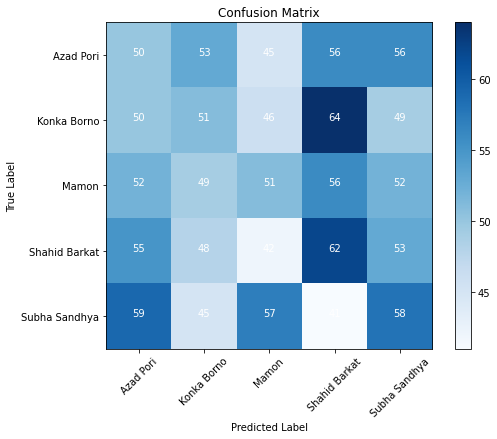

In [ ]:
cm_plot_labels = ['Azad Pori' , 'Konka Borno' , 'Mamon', 'Shahid Barkat', 'Subha Sandhya']
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels  , predictions.argmax(axis = 1))

0.20923076923076922

In [ ]:
from sklearn.metrics import classification_report
classification_report(test_labels  , predictions.argmax(axis = 1))

'              precision    recall  f1-score   support\n\n           0       0.19      0.19      0.19       260\n           1       0.21      0.20      0.20       260\n           2       0.21      0.20      0.20       260\n           3       0.22      0.24      0.23       260\n           4       0.22      0.22      0.22       260\n\n    accuracy                           0.21      1300\n   macro avg       0.21      0.21      0.21      1300\nweighted avg       0.21      0.21      0.21      1300\n'

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr,tpr,th = roc_curve(test_labels  , predictions.argmax(axis = 1), pos_label =2)

In [ ]:
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(['ROC Curve'], loc='upper left')
plt.show()